# Perkenalan

Nama : Hilal Amirudin

Batch : RMT 019

Objektiv : Laporan Trend pergerakan saham perbankan

Dashboard Notebook : https://lookerstudio.google.com/reporting/2b8ed0b1-ec4e-45ea-be98-53c953d1c7c7

# Pendahuluan

## Latar Belakang

Investasi dan trading di pasar saham sangat tergantung pada kemampuan untuk memahami trend pergerakan data saham. Dalam dunia investasi dan trading, pemahaman yang baik tentang tren pasar dapat membantu investor dan trader untuk mengambil keputusan yang cerdas dan menguntungkan.

Saya adalah seorang Data Analyst yang diminta oleh Candy Crush Sekuritas untuk membuat laporan trend pergerakan harga saham sektor perbankan. Tugas ini sangat penting dalam membantu Candy Crush Sekuritas membuat keputusan trading dan investasi yang cerdas dan menguntungkan di pasar saham.

## Tujuan



*   Mengklasifikasi jenis perusahaan di sektor perbankan
*   Mengetahui Jenis saham dengan market cap terbesar
*   Mengetahui pergerakan harga secara tahunan



## Rumusan Masalah

Perusahaan Candy Crush Sekuritas berencana untuk berinvestasi di sektor perbankan karena mempertimbangkan suku bunga acuan Bank Indonesia yang masih tinggi dan akan memberikan keuntungan besar bagi industri perbankan dari sisi Net Interest Marginnya. perusahaan berencana memilih 1 perusahaan perbankan sebagai portofolionya dan mengharapkan keuntungan dimasa yang akan datang

Maka dari itu Candy Crush sekuritas perlu mengetahui data pergerakan saham sektor perbankan dalam di Bursa Efek Indonesia

Ada beberapa pertanyaan yang akan kita jawab pada proses analisis:

1. Berapa jumlah presentase sektor perbankan/finance di Bursa Efek Indonesia?
2. Sebutkan 4 saham perbankan dengan kapitalisasi terbesar?
3. Sebutkan 4 saham perbankan dengan jumlah saham beredar terbanyak?
4. Sebutkan 4 saham perbankan yang paling lama dan paling baru lsting di Bursa Efek Indonesia?
5. Bagaimana pergerakan harga saham perbankan dengan kapitalisasi pasar terbesar?
6. Apakah jumlah saham beredar memiliki prefensi dengan kapitalisasi pasar?


# Import Library

In [252]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

# Data Loading

Sumber data : https://www.kaggle.com/datasets/muamkh/ihsgstockdata

Penjelasan struktur dataset pada Data_saham

*   Code = Stock code
*   Name = Company name
*   ListingDate = Listing date of stock on Indonesia Stock Exchange
*   Shares = Amount of shares
*   ListingBoard = Board category (Main Board, Development Board or Acceleration)
*   Sector = Sector Category based on IDX-IC.
*   LastPrice = Last stock price
*   MarketCap = Market Capitalization.
*   MinutesFirstAdded = Date the data first retrieved in minute range
*   MinutesLastAdded = Date the data last retrieved in minute range
*   HourlyFirstAdded = Date the data first retrieved in hourly range
*   HourlyLastAdded = Date the data last retrieved in hourly range
*   DailyFirstAdded = Date the data first retrieved in daily range
*   DailyLastAdded = Date the data last retrieved in daily range

In [253]:
Data_saham = pd.read_csv('/content/drive/MyDrive/ihsgstockdata/DaftarSaham.csv')
Data_saham

,Code,Name,ListingDate,Shares,ListingBoard,Sector,LastPrice,MarketCap,MinutesFirstAdded,MinutesLastUpdated,HourlyFirstAdded,HourlyLastUpdated,DailyFirstAdded,DailyLastUpdated
0,AALI,Astra Agro Lestari Tbk.,1997-12-09,1.924688e+09,Utama,Consumer Non-Cyclicals,8000.0,1.539751e+13,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2001-04-16,2023-01-06
1,ABBA,Mahaka Media Tbk.,2002-04-03,3.935893e+09,Pengembangan,Consumer Cyclicals,142.0,5.588968e+11,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2002-04-03,2023-01-06
2,ABDA,Asuransi Bina Dana Arta Tbk.,1989-07-06,6.208067e+08,Pengembangan,Financials,6700.0,4.159405e+12,2021-11-01 09:00:00,2022-11-11 15:59:00,2020-04-16 09:00:00,2022-11-11 16:00:00,2001-04-16,2023-01-06
3,ABMM,ABM Investama Tbk.,2011-12-06,2.753165e+09,Utama,Industrials,3050.0,8.397153e+12,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2011-12-06,2023-01-06
4,ACES,Ace Hardware Indonesia Tbk.,2007-11-06,1.715000e+10,Utama,Consumer Cyclicals,490.0,8.403500e+12,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2007-11-06,2023-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,ZATA,Bersama Zatta Jaya Tbk.,2022-11-10 00:00:00,8.496000e+09,Utama,Consumer Cyclicals,112.0,9.515520e+11,2022-11-10 09:00:00,2023-01-06 15:59:00,2022-11-10 09:00:00,2023-01-06 15:00:00,2022-11-11,2023-01-06
825,ZBRA,Dosni Roha Indonesia Tbk.,1991-08-01,2.510706e+09,Pengembangan,Industrials,540.0,1.355781e+12,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2001-04-16,2023-01-06
826,ZINC,Kapuas Prima Coal Tbk.,2017-10-16,2.525000e+10,Pengembangan,Basic Materials,50.0,1.262500e+12,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2017-10-16,2023-01-06
827,ZONE,Mega Perintis Tbk.,2018-12-12,8.701715e+08,Pengembangan,Consumer Cyclicals,1205.0,1.048557e+12,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2018-12-12,2023-01-06


In [254]:
Data_saham.head()

,Code,Name,ListingDate,Shares,ListingBoard,Sector,LastPrice,MarketCap,MinutesFirstAdded,MinutesLastUpdated,HourlyFirstAdded,HourlyLastUpdated,DailyFirstAdded,DailyLastUpdated
0,AALI,Astra Agro Lestari Tbk.,1997-12-09,1.924688e+09,Utama,Consumer Non-Cyclicals,8000.0,1.539751e+13,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2001-04-16,2023-01-06
1,ABBA,Mahaka Media Tbk.,2002-04-03,3.935893e+09,Pengembangan,Consumer Cyclicals,142.0,5.588968e+11,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2002-04-03,2023-01-06
2,ABDA,Asuransi Bina Dana Arta Tbk.,1989-07-06,6.208067e+08,Pengembangan,Financials,6700.0,4.159405e+12,2021-11-01 09:00:00,2022-11-11 15:59:00,2020-04-16 09:00:00,2022-11-11 16:00:00,2001-04-16,2023-01-06
3,ABMM,ABM Investama Tbk.,2011-12-06,2.753165e+09,Utama,Industrials,3050.0,8.397153e+12,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2011-12-06,2023-01-06
4,ACES,Ace Hardware Indonesia Tbk.,2007-11-06,1.715000e+10,Utama,Consumer Cyclicals,490.0,8.403500e+12,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2007-11-06,2023-01-06


In [255]:
Data_saham.tail()

,Code,Name,ListingDate,Shares,ListingBoard,Sector,LastPrice,MarketCap,MinutesFirstAdded,MinutesLastUpdated,HourlyFirstAdded,HourlyLastUpdated,DailyFirstAdded,DailyLastUpdated
824,ZATA,Bersama Zatta Jaya Tbk.,2022-11-10 00:00:00,8.496000e+09,Utama,Consumer Cyclicals,112.0,9.515520e+11,2022-11-10 09:00:00,2023-01-06 15:59:00,2022-11-10 09:00:00,2023-01-06 15:00:00,2022-11-11,2023-01-06
825,ZBRA,Dosni Roha Indonesia Tbk.,1991-08-01,2.510706e+09,Pengembangan,Industrials,540.0,1.355781e+12,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2001-04-16,2023-01-06
826,ZINC,Kapuas Prima Coal Tbk.,2017-10-16,2.525000e+10,Pengembangan,Basic Materials,50.0,1.262500e+12,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2017-10-16,2023-01-06
827,ZONE,Mega Perintis Tbk.,2018-12-12,8.701715e+08,Pengembangan,Consumer Cyclicals,1205.0,1.048557e+12,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2018-12-12,2023-01-06
828,ZYRX,Zyrexindo Mandiri Buana Tbk.,2021-03-30,1.333333e+09,Pengembangan,Technology,310.0,4.133333e+11,2021-11-01 09:00:00,2023-01-06 15:59:00,2021-03-30 09:00:00,2023-01-06 15:00:00,2021-03-30,2023-01-06


# Data Cleaning

In [256]:
# Kita perlu mengetahui terlebih dahulu tipe data pada dataset

Data_saham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code                829 non-null    object 
 1   Name                829 non-null    object 
 2   ListingDate         829 non-null    object 
 3   Shares              829 non-null    float64
 4   ListingBoard        829 non-null    object 
 5   Sector              829 non-null    object 
 6   LastPrice           824 non-null    float64
 7   MarketCap           824 non-null    float64
 8   MinutesFirstAdded   787 non-null    object 
 9   MinutesLastUpdated  787 non-null    object 
 10  HourlyFirstAdded    806 non-null    object 
 11  HourlyLastUpdated   806 non-null    object 
 12  DailyFirstAdded     824 non-null    object 
 13  DailyLastUpdated    824 non-null    object 
dtypes: float64(3), object(11)
memory usage: 90.8+ KB


In [257]:
# dikarenakan tipe data dari Listing seharusnya berupa tanggal maka kita akan rubah tipe data dari object ke tanggal

Data_saham['ListingDate'] = pd.to_datetime(Data_saham['ListingDate'])

In [258]:
# Lalu dicek apakah sudah berubah

Data_saham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Code                829 non-null    object        
 1   Name                829 non-null    object        
 2   ListingDate         829 non-null    datetime64[ns]
 3   Shares              829 non-null    float64       
 4   ListingBoard        829 non-null    object        
 5   Sector              829 non-null    object        
 6   LastPrice           824 non-null    float64       
 7   MarketCap           824 non-null    float64       
 8   MinutesFirstAdded   787 non-null    object        
 9   MinutesLastUpdated  787 non-null    object        
 10  HourlyFirstAdded    806 non-null    object        
 11  HourlyLastUpdated   806 non-null    object        
 12  DailyFirstAdded     824 non-null    object        
 13  DailyLastUpdated    824 non-null    object        

In [259]:
# Mengecek missing value pada dataset

Data_saham.isnull().sum()

Code                   0
Name                   0
ListingDate            0
Shares                 0
ListingBoard           0
Sector                 0
LastPrice              5
MarketCap              5
MinutesFirstAdded     42
MinutesLastUpdated    42
HourlyFirstAdded      23
HourlyLastUpdated     23
DailyFirstAdded        5
DailyLastUpdated       5
dtype: int64

terdapat missing value pada kolom Last Price dan MarketCap. kita akan membiarkan data tersebut kosong dikarenankan data tersebut berkaitan erat dengan waktu perdaganan suatu saham dan tidak bisa diisi menggunakan mean, median, adatu modus karena akan menghilangkan variable real data

# Analisis dan perhitungan

## Analisis Sektor Industri

Bursa Efek Indonesia terdiri dari berbagai jenis saham dari bergabagi jenis sektor. hal ini sangat penting bagi investor untuk menyesuaikan pilihan sahamnya pada sektor industri tertentu sesuai dengan analisis kondisi makro ekonomi

In [260]:
# Jumlah saham berbagai macam sektor di Bursa Efek Indonesia

Data_saham['Sector'].value_counts()

Consumer Cyclicals           142
Consumer Non-Cyclicals       115
Financials                   106
Basic Materials               96
Properties & Real Estate      84
Energy                        75
Infrastructures               62
Industrials                   56
Technology                    34
Transportation & Logistic     31
Healthcare                    28
Name: Sector, dtype: int64

<Axes: title={'center': 'Sektor di Bursa Efek'}, ylabel='Sector'>

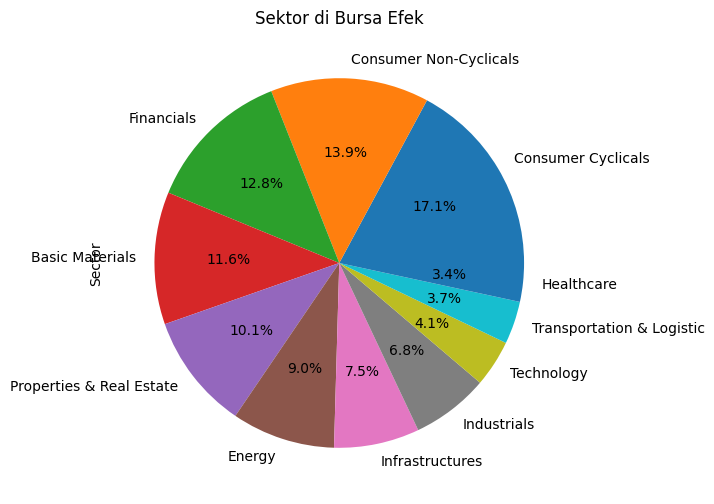

In [261]:
# melihat presentase persebaran sektor di Bursa Efek Indonesia menggunakan pie chart

Data_saham['Sector'].value_counts().plot(kind='pie',
                                        figsize=(6, 6),
                                        title='Sektor di Bursa Efek',
                                        autopct='%1.1f%%')

Sektor Consumer Cyclicals merupakan sektor industri dengan proporsi emiten/saham terbanyak sebesar 17.1%

---
Sektor Consumer Non-Cyclicals merupakan sektor industri dengan proporsi emiten/saham kedua sebesar 13.9%

---
Sektor Financial merupakan sektor industri dengan proporsi emiten/saham ketiga terbanyak sebesar 12.8%

---
Pemilihan sektor Financials atau keuangan dirasa cocok dikarena porsi persebaran sahamnya di Bursa Efek Indonesia terbesar ketiga

## Saham Sektor Finance

Dikarenakan candy crunch sekuritas ingin berinvestasi pada sektor perbankan, maka kita akan memilih sektor Finance yang di dalamnya terdapat emiten/saham dari perusahaan perbankan.

In [262]:
# menarik data dari Data_Saham hanya untuk sektor hanya Financials

sektorfinance = Data_saham[Data_saham['Sector'] == 'Financials']
sektorfinance

,Code,Name,ListingDate,Shares,ListingBoard,Sector,LastPrice,MarketCap,MinutesFirstAdded,MinutesLastUpdated,HourlyFirstAdded,HourlyLastUpdated,DailyFirstAdded,DailyLastUpdated
2,ABDA,Asuransi Bina Dana Arta Tbk.,1989-07-06,6.208067e+08,Pengembangan,Financials,6700.0,4.159405e+12,2021-11-01 09:00:00,2022-11-11 15:59:00,2020-04-16 09:00:00,2022-11-11 16:00:00,2001-04-16,2023-01-06
9,ADMF,Adira Dinamika Multi Finance T,2004-03-31,1.000000e+09,Utama,Financials,8850.0,8.850000e+12,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2004-03-31,2023-01-06
15,AGRO,Bank Raya Indonesia Tbk.,2003-08-08,2.252005e+10,Utama,Financials,406.0,9.143142e+12,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2003-08-08,2023-01-06
16,AGRS,Bank IBK Indonesia Tbk.,2014-12-22,1.748160e+10,Pengembangan,Financials,89.0,1.555863e+12,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2014-12-22,2023-01-06
17,AHAP,Asuransi Harta Aman Pratama Tb,1990-09-14,2.940000e+09,Pengembangan,Financials,64.0,1.881600e+11,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2001-04-16,2023-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,VINS,Victoria Insurance Tbk.,2015-09-28,1.460574e+09,Pengembangan,Financials,133.0,1.942563e+11,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2015-09-28,2023-01-06
800,VRNA,Verena Multi Finance Tbk.,2008-06-25,5.687354e+09,Pengembangan,Financials,99.0,5.630480e+11,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2008-06-25,2023-01-06
801,VTNY,Venteny Fortuna International,2022-12-15,6.265193e+09,Pengembangan,Financials,444.0,2.781746e+12,2022-12-15 09:00:00,2023-01-06 15:59:00,2022-12-15 09:00:00,2023-01-06 15:00:00,2022-12-15,2023-01-06
815,WOMF,Wahana Ottomitra Multiartha Tb,2004-12-13,3.481481e+09,Utama,Financials,256.0,8.912593e+11,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2004-12-13,2023-01-06


Setelah mengetahui berbagai macam jenis perusahaan yang ada di dalam sektor financial. maka kita perlu mengetahui terlebih dahulu kapitalisasi pasar dari saham/emiten tersebut.

---

Hal ini sangat penting dikarenakan Kapitalisasi pasar dapat digunakan sebagai salah satu parameter untuk menilai ukuran perusahaan dan tingkat likuiditasnya di pasar modal.

---

Perusahaan dengan Kapitalisasi pasar yang besar cenderung dianggap sebagai perusahaan yang stabil dan memiliki potensi keuntungan yang lebih tinggi, namun juga memiliki risiko yang lebih besar. Sebaliknya, perusahaan dengan Kapitalisasi pasar yang kecil cenderung lebih rentan terhadap fluktuasi pasar, namun juga memiliki potensi keuntungan yang tinggi.

## Saham perbankan dengan kapitalisasi pasar terbesar

In [263]:
# kita akan melakukan groupkan dari dataset 'sektorfinance' berdasrkan nama saham 'code' dan kapitalisasi pasarnya 'MarketCap'

marketcapindo = sektorfinance.groupby('Code')['MarketCap'].max()
marketcapindo

Code
ABDA    4.159405e+12
ADMF    8.850000e+12
AGRO    9.143142e+12
AGRS    1.555863e+12
AHAP    1.881600e+11
            ...     
VINS    1.942563e+11
VRNA    5.630480e+11
VTNY    2.781746e+12
WOMF    8.912593e+11
YULE    3.980550e+12
Name: MarketCap, Length: 106, dtype: float64

In [264]:
# Karena data dari 'marketcapindo' terlalu banyak dan tidak berurutan makan kita akan mengurutkan data terbesar dari kapitalisasi pasarnya

marketcapindo = sektorfinance.groupby('Code')['MarketCap'].max().sort_values(ascending=False).head(10)

<Axes: title={'center': 'Market Cap Sektor Finance'}, ylabel='Code'>

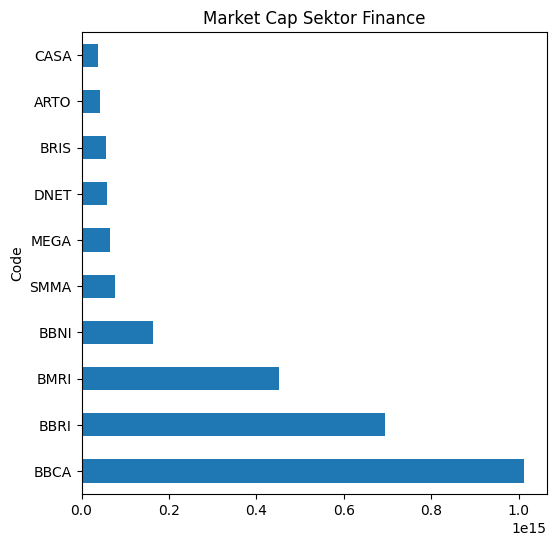

In [265]:
# agar lebih mudah untuk dilihat kita akan mengubahnya dalam bentuk grafik

marketcapindo.plot(kind='barh',
                 figsize=(6, 6),
                 title='Market Cap Sektor Finance')

Dapat dilihat pada sektor Financial 4 saham dengan kapitalisasi terbesar merupakan saham perbankan.

1. Bank BCA (BBCA)
2. Bank Rakyat Indonesia (BBRI)
3. Bank Mandiri (BMRI)
4. Bank Negara Indonesia (BBNI)

## Saham Perbankan dengan Jumlah Saham Beredar Terbesar

Dikarenakan Kapitalisasi Pasar berkaitan erat dengan Jumlah saham beredar maka kita perlu mengetahui jumlah saham beredar perusahaan perbankan di sektor finance

In [266]:
# kita akan melakukan groupkan dari dataset 'sektorfinance' berdasrkan nama saham 'code' dan jumlah saham beredarnya 'shares'

Saham_Beredar = sektorfinance.groupby('Code')['Shares'].max()
Saham_Beredar

Code
ABDA    6.208067e+08
ADMF    1.000000e+09
AGRO    2.252005e+10
AGRS    1.748160e+10
AHAP    2.940000e+09
            ...     
VINS    1.460574e+09
VRNA    5.687354e+09
VTNY    6.265193e+09
WOMF    3.481481e+09
YULE    1.785000e+09
Name: Shares, Length: 106, dtype: float64

In [267]:
# Karena data dari 'Saham_Beredar' terlalu banyak dan tidak berurutan makan kita akan mengurutkan data terbesar dari jumlah saham beredarnya

Saham_Beredar = sektorfinance.groupby('Code')['Shares'].max().sort_values(ascending=False).head(10)

In [268]:
# kita akan membuatnya dalam bentuk table agar mudah dilihat

Saham_Beredar1 = Saham_Beredar.to_frame()
Saham_Beredar1

,Shares
Code,
BBRI,1.500434e+11
BBCA,1.220423e+11
BNII,7.535743e+10
BBKP,6.701989e+10
CASA,5.447627e+10
BEKS,5.135173e+10
BMRI,4.620000e+10
BCAP,4.261885e+10
BRIS,4.071792e+10


<Axes: title={'center': 'Jumlah Saham Beredar Sektor Finance'}, ylabel='Code'>

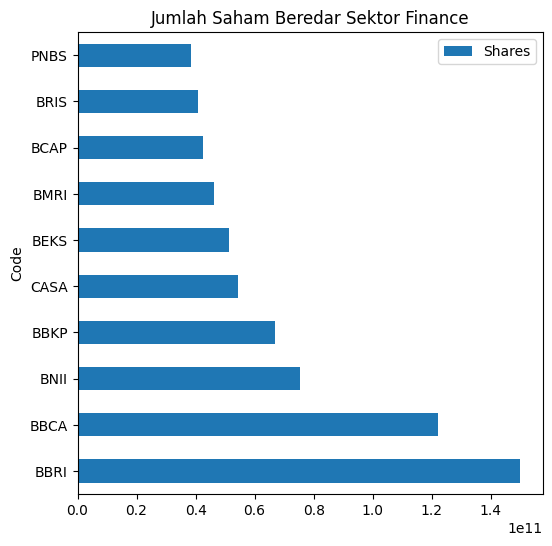

In [269]:
# agar lebih mudah untuk dilihat kita akan mengubahnya data table 'Saham_Beredar1' dalam bentuk grafik

Saham_Beredar1.plot(kind='barh',
                 figsize=(6, 6),
                 title='Jumlah Saham Beredar Sektor Finance')

Dari Grafik jumlah saham perbankan di Bursa efek Indonesia yang terbesar didominasi oleh saham berikut:

1.   Bank Rakyat Indonesia (BBRI)
2.   Bank Central Asia (BBCA)
3.   Bank Negara Indonesia (BBNI)
4.   Bank KB Bukopin (BBKP)

## Penerbitan Saham perbankan di Bursa Efek Indonesia

Selain Faktor Kapitalisasi Pasar dan Jumlah Saham beredar. terdapat satu parameter berupa umur saham. Saham yang telah lama terdaftar di bursa saham dan memiliki sejarah kinerja yang baik dapat memberikan indikasi bahwa saham tersebut stabil dan memiliki potensi untuk memberikan keuntungan dalam jangka panjang. 

## Saham terlama sektor finance di Bursa Efek Indonesia

In [270]:
# kita akan melakukan grouping saham 'code' dan 'Listingdate' nilai ter minimal

Saham_Lama = sektorfinance.groupby('Code')['ListingDate'].min()
Saham_Lama

Code
ABDA   1989-07-06
ADMF   2004-03-31
AGRO   2003-08-08
AGRS   2014-12-22
AHAP   1990-09-14
          ...    
VINS   2015-09-28
VRNA   2008-06-25
VTNY   2022-12-15
WOMF   2004-12-13
YULE   2004-12-10
Name: ListingDate, Length: 106, dtype: datetime64[ns]

In [271]:
# karena data yang ditampilkan banyak maka kita akan mengambil 10 data saja

Saham_Lama = sektorfinance.groupby('Code')['ListingDate'].min().sort_values(ascending=True).head(10)

In [272]:
# lalu kita baut dalam bentuk table dataset

Saham_lama = Saham_Lama.to_frame()
Saham_lama

,ListingDate
Code,
PNBN,1982-12-29
PNLF,1983-06-14
PNIN,1983-09-20
ABDA,1989-07-06
MREI,1989-09-04
GSMF,1989-10-23
BNII,1989-11-21
ASBI,1989-11-29
BNGA,1989-11-29


In [273]:
Saham_lama.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, PNBN to BDMN
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ListingDate  10 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 160.0+ bytes


setelah dicek ternyata tipe data pada Listingdate adalah objek

In [274]:
# kita rubah tipe data dari object ke datetime

Saham_lama['ListingDate'] = pd.to_datetime(Saham_lama['ListingDate'])

In [275]:
#kita pilihhanya berdasarkan tahun saja

Saham_lama['ListingDate'] = Saham_lama['ListingDate'].dt.year

In [276]:
Saham_lama

,ListingDate
Code,
PNBN,1982
PNLF,1983
PNIN,1983
ABDA,1989
MREI,1989
GSMF,1989
BNII,1989
ASBI,1989
BNGA,1989


Dapat disimpulkan rata-rata saham perbankan seperti PNBN, BNII, BNGA, dan BDMN merupakan saham yang sudah lama listing di Bursa Efek Indonesia

* PT Bank Pan Indonesia Tbk (PNBN) atau disebut Bank Panin
* PT Bank Maybank Indonesia Tbk (BNII) atau disebut Maybank
* PT Bank CIMB Niaga Tbk (BNGA)
* PT Bank Danamon Indonesia Tbk (BDMN)

## Saham terbaru sektor finance di Bursa Efek Indonesia

In [277]:
# kita akan melakukan grouping saham 'code' dan 'Listingdate' nilai ter maximal

Saham_Baru = sektorfinance.groupby('Code')['ListingDate'].max()
Saham_Baru

Code
ABDA   1989-07-06
ADMF   2004-03-31
AGRO   2003-08-08
AGRS   2014-12-22
AHAP   1990-09-14
          ...    
VINS   2015-09-28
VRNA   2008-06-25
VTNY   2022-12-15
WOMF   2004-12-13
YULE   2004-12-10
Name: ListingDate, Length: 106, dtype: datetime64[ns]

In [278]:
# karena data yang ditampilkan banyak maka kita akan mengambil 10 data saja

Saham_Baru = sektorfinance.groupby('Code')['ListingDate'].max().sort_values(ascending=False).head(10)

In [279]:
# lalu kita baut dalam bentuk table dataset

Saham_baru1 = Saham_Baru.to_frame()
Saham_baru1

,ListingDate
Code,
VTNY,2022-12-15
MASB,2021-06-30
BANK,2021-02-01
BBSI,2020-09-07
BHAT,2020-04-15
AMOR,2020-01-14
AMAR,2020-01-09
LIFE,2019-07-09
FUJI,2019-07-09


In [280]:
# pada kolom listingdate terdapat jam yang kemungkinan datanya belum berubah ke tipe data datetime
# kita cek tipe datanya
Saham_baru1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, VTNY to SFAN
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ListingDate  10 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 160.0+ bytes


In [281]:
# kita rubah tipe data dari object ke datetime
Saham_baru1['ListingDate'] = pd.to_datetime(Saham_baru1['ListingDate'])

In [282]:
# karena terdapat waktu pada kolom date frame maka kita akan menghilangkannya dan merubahnya hanya menjadi tahun

Saham_baru1['ListingDate'] = Saham_baru1['ListingDate'].dt.year

In [283]:
Saham_baru1

,ListingDate
Code,
VTNY,2022
MASB,2021
BANK,2021
BBSI,2020
BHAT,2020
AMOR,2020
AMAR,2020
LIFE,2019
FUJI,2019


Dapat disimpulkan saham perbankan seperti MASB, BANK, BBSI, BHAT, dan AMAR merupakan saham yang paling baru listing di Bursa Efek Indonesia sejak tahun 2022

* Bank Multiarta Sentosa (MASB)
* PT Bank Aladin Syariah Tbk (BANK)
* PT Krom Bank Indonesia Tbk (BBSI)
* PT Bhakti Multi Artha Tbk (BHAT)
* Bank Amar Indonesia (AMAR)

Dikarenakan pada tabel dataset saham_lama dan saham_baru tidak terdapat jenis saham dengan 4 kapitalisasi pasar terbesar. maka kita akan cari tau umur dari 4 saham dengan kapitalisasi terbesar.

In [284]:
# Tanggal Listing saham BBCA

sektorfinance.loc[sektorfinance["Code"] == "BBCA", "ListingDate"].value_counts()

2000-05-31    1
Name: ListingDate, dtype: int64

In [285]:
# Tanggal Listing saham BBRI

sektorfinance.loc[sektorfinance["Code"] == "BBRI", "ListingDate"].value_counts()

2003-11-10    1
Name: ListingDate, dtype: int64

In [286]:
# Tanggal Listing saham BMRI

sektorfinance.loc[sektorfinance["Code"] == "BMRI", "ListingDate"].value_counts()

2003-07-14    1
Name: ListingDate, dtype: int64

In [287]:
# Tanggal Listing saham BBNI

sektorfinance.loc[sektorfinance["Code"] == "BBNI", "ListingDate"].value_counts()

1996-11-25    1
Name: ListingDate, dtype: int64

## Pergerakan harga saham kapitalisasi pasar terbesar

Saham dengan kapitalisasi pasar terbesar adalah saham Bank BCA (BBCA)

In [288]:
# Load data pergerakan harga saham BBCA harian

BBCA_daily = pd.read_csv('/content/drive/MyDrive/ihsgstockdata/daily/BBCA.csv')
BBCA_daily

,timestamp,open,low,high,close,volume
0,2001-04-16,175,175,180,177,0
1,2001-04-17,175,175,180,177,0
2,2001-04-18,175,175,180,177,0
3,2001-04-19,175,175,180,177,0
4,2001-04-20,175,175,180,177,0
...,...,...,...,...,...,...
5665,2023-01-02,8575,8500,8600,8550,10653900
5666,2023-01-03,8550,8525,8600,8550,27399100
5667,2023-01-04,8525,8350,8575,8350,90918800
5668,2023-01-05,8350,8150,8375,8250,128838500


Penjelasan dari dataset:

1. Timestamp = waktu periode perdagangan saham
2. Open  = harga pembukaan
3. low   = harga terendah
4. high  = harga tertinggi
5. close = harga penutupan

In [289]:
# cek tipe datanya

BBCA_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  5670 non-null   object
 1   open       5670 non-null   int64 
 2   low        5670 non-null   int64 
 3   high       5670 non-null   int64 
 4   close      5670 non-null   int64 
 5   volume     5670 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 265.9+ KB


In [290]:
# kita rubah tipe data timestamp jadi tipe data datetime

BBCA_daily['timestamp'] = pd.to_datetime(BBCA_daily['timestamp'])
BBCA_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  5670 non-null   datetime64[ns]
 1   open       5670 non-null   int64         
 2   low        5670 non-null   int64         
 3   high       5670 non-null   int64         
 4   close      5670 non-null   int64         
 5   volume     5670 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 265.9 KB


In [291]:
# kita cek missing valuenya menggunakan isnull

BBCA_daily.isnull().sum()

timestamp    0
open         0
low          0
high         0
close        0
volume       0
dtype: int64

dan ternyata tidak terdapat missing value pada data tersebut

In [292]:
# kita akan mengecek distribusi datanya simetris atau tidak

BBCA_daily.skew()

<ipython-input-292-264bcbff63bd>:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  BBCA_daily.skew()


open      0.999620
low       1.001040
high      1.000966
close     1.001465
volume    5.422159
dtype: float64

Ternyata nilainya lebih dari 0 hal ini menggambarkan distribusi data yang tidak simetris atau cenderung positif memiliki ekor panjang kekanan dan memiliki outliar


---


Maka dari itu kita akan cek distribusi datanya berdasarkan central tendencynya (mean, median, mode) dan standar deviasinya dengan menggunakan data 'close' atau penutupan harga saham.


---


Pemilihan close atau penutupan harga saham dirasa relevan karane harga pada close adalah harga final dari waktu suatu saham diperdagangkan.

In [293]:
# karena terdapat waktu pada kolom date frame maka kita akan menghilangkannya dan merubahnya hanya menjadi tahun

BBCA_daily['timestamp'] = BBCA_daily['timestamp'].dt.year

In [294]:
BBCA_daily.to_csv('data_edit2.csv', index=False)

In [295]:
BCA=BBCA_daily['close']

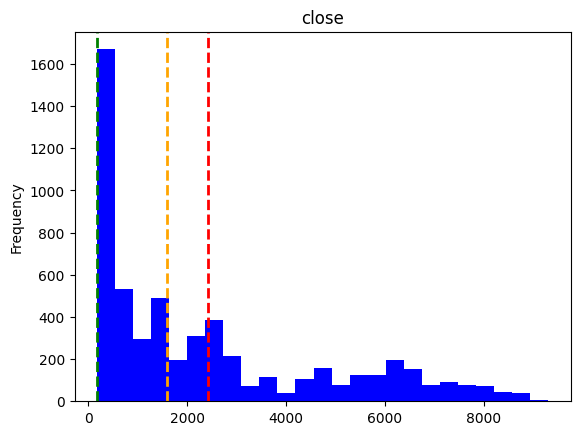

In [296]:
# Central tendency grafik

BCA.plot.hist(title='close', color='blue', bins=25);
plt.axvline(BCA.mean(), color='red', linestyle='dashed', linewidth=2);
plt.axvline(BCA.median(), color='orange', linestyle='dashed', linewidth=2);
plt.axvline(BCA.mode()[0], color='green', linestyle='dashed', linewidth=2);

dapat dilihat dari data tersebut Distribusi tidak normal atau cenderung kemiringannya positif (miring ke kanan)

lalu bagaimana dengan volume perdagangan sahamnya?

In [297]:
volbca = BBCA_daily['volume']

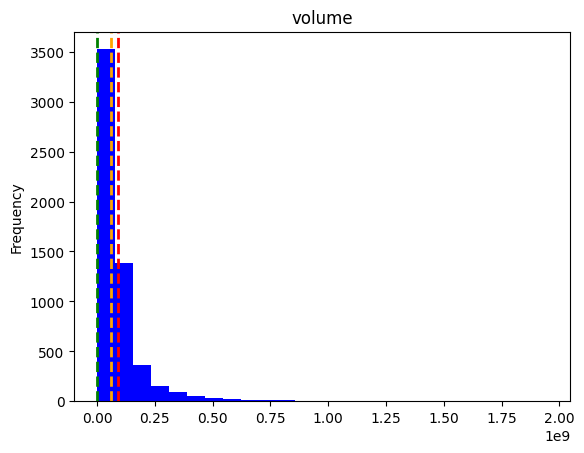

In [298]:
# Central tendency grafik

volbca.plot.hist(title='volume', color='blue', bins=25);
plt.axvline(volbca.mean(), color='red', linestyle='dashed', linewidth=2);
plt.axvline(volbca.median(), color='orange', linestyle='dashed', linewidth=2);
plt.axvline(volbca.mode()[0], color='green', linestyle='dashed', linewidth=2);

distribusi datanya juga tidak normal 

mari kita cek Outliar dari kedua data tersebut

### Outliar

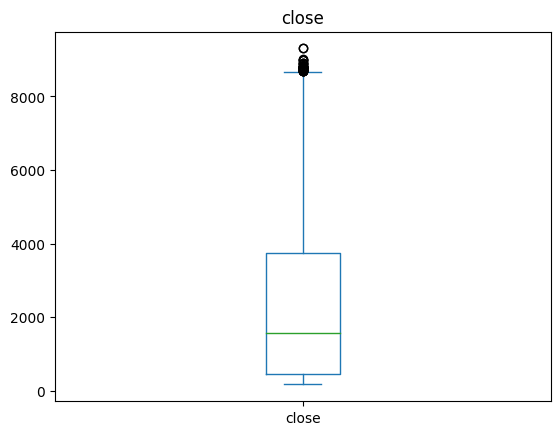

In [299]:
# data 'close'

BBCA_daily['close'].plot(kind='box', title='close');

Pada data 'close' titik-titik pada grafik yang ditampilkan cenderung berdempetan dan sedikit. dapat kita simpulkan outliarnya tidak signifikan pada data tersebut.


---


Hal ini dapat terjadi karena harga perdagangan saham dipengaruhi oleh faktor-faktor yang stabil dan umumnya tidak terlalu fluktuatif. seperti kinerja keuangan perusahaan, tingkat persaingan dalam industri, kondisi ekonomi makro, dan kebijakan pemerintah. Faktor-faktor ini tidak terjadi secara tiba-tiba atau acak, dan umumnya memberikan dampak yang stabil pada harga saham.


---


Selain itu, harga saham juga cenderung tidak fluktuatif karena ada banyak investor yang memperhatikan harga saham untuk membuat keputusan investasi mereka. Dalam pasar yang efisien, harga saham akan cenderung mencerminkan semua informasi yang tersedia tentang perusahaan, dan nilai saham akan mencerminkan nilai intrinsik perusahaan.

---
marik kita lihat grafik pergerakan harganya apakah sesuai dengan kesimpulan outliar yang ditampilkan?


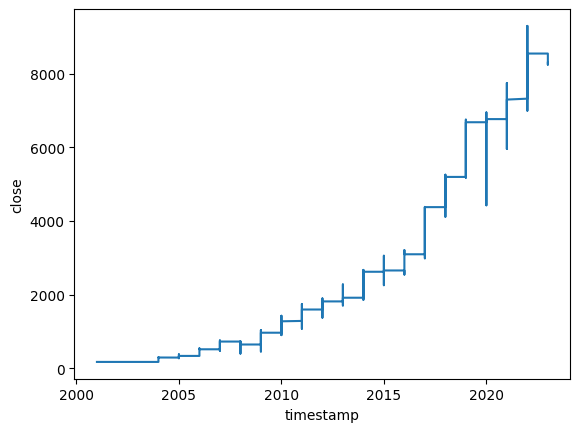

In [300]:
# grafik pergerakan harga saham BBCA dari awal terbit hingga tahun 2022 melalui dataset 'close'

plt.plot(BBCA_daily['timestamp'], BBCA_daily['close'])
plt.xlabel('timestamp')
plt.ylabel('close')
plt.show()

Berdasarkan grafik tersebut harga saham BBCA terus meningkat dari tahun ke tahun

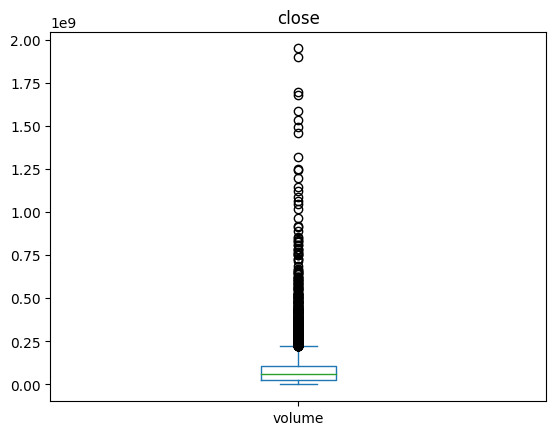

In [301]:
# data 'volume'

BBCA_daily['volume'].plot(kind='box', title='close');

Sementara pada data 'volume' dapat terlihat banyak titik-titiknya dan dapat dipastikan memiliki outliar pada data tersebut.

---
Hal ini dapat disebabkan oleh beberapa faktor:
1. Peristiwa yang tidak terduga: Volume perdagangan saham dapat meningkat secara drastis saat terjadi peristiwa yang tidak terduga seperti pengumuman kebijakan baru, kejadian politik, atau bencana alam. Hal ini dapat menyebabkan adanya nilai-nilai outlier pada data volume perdagangan.
2. Aktivitas spekulatif: Aktivitas spekulatif atau transaksi yang dilakukan oleh investor dengan tujuan mendapatkan keuntungan cepat dalam jangka pendek juga dapat menyebabkan adanya nilai-nilai outlier pada data volume perdagangan.
3. Ketersediaan informasi: Informasi yang tersedia pada suatu saham, termasuk informasi yang belum tersedia untuk publik, dapat mempengaruhi volume perdagangan saham. Jika informasi yang tersedia sangat penting, dapat menyebabkan adanya perubahan volume perdagangan yang signifikan dan nilai-nilai outlier pada data volume perdagangan.
4. Karakteristik saham: Karakteristik saham seperti volatilitas harga, kapitalisasi pasar, sektor industri, dan likuiditas dapat mempengaruhi volume perdagangan saham dan menyebabkan adanya nilai-nilai outlier pada data volume perdagangan.

---
Mari kita lihat grafik pergerakan volume perdagangan sahamnya apakah sesuai dengan kesimpulan outliar yang ditampilkan?



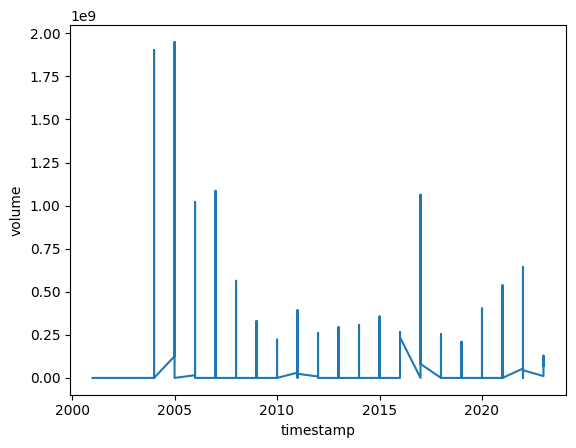

In [302]:
# grafik pergerakan volume perdagangan saham BBCA dari awal terbit hingga tahun 2022 melalui dataset 'close'

plt.plot(BBCA_daily['timestamp'], BBCA_daily['volume'])
plt.xlabel('timestamp')
plt.ylabel('volume')
plt.show()

Berdasarkan data tersebut volume perdagangan cenderung fluktuaktif pergerakannya dari tahun ke tahun

Kesimpulan
1. pada data haraga saham 'close' karena distribusi ouliarnya normal maka kita akan cek std dan zscorenya
2. pada data volume perdagan distribusi outliarnya tidak normal maka kita akan cek IQR (turkey rule)

### STD

In [303]:
upper_limit=BBCA_daily['close'].mean() + 3*BBCA_daily['close'].std()
lower_limit=BBCA_daily['close'].mean() - 3*BBCA_daily['close'].std()

print(upper_limit)
print(lower_limit)

9554.997625471568
-4717.7912762652195


In [304]:
BBCA_daily.shape[0]

5670

In [305]:
BBCA_daily[BBCA_daily['close'] > upper_limit].shape

(0, 6)

nilai outliarnya adalah 0 baris

In [306]:
# outliar

data_outlier_BCA= BBCA_daily[(BBCA_daily['close'] > upper_limit) | (BBCA_daily['close'] < lower_limit)]
data_outlier_BCA.shape[0]

0

In [307]:
# bukan outliar

no_outlier_BCA= BBCA_daily[~((BBCA_daily['close'] > upper_limit) | (BBCA_daily['close'] < lower_limit))]
no_outlier_BCA.shape[0]

5670

In [308]:
BBCA_daily.shape[0]

5670

### Z-Score

In [309]:
BCAnew = BBCA_daily.copy()

In [310]:
BCAnew['zscore']= (BBCA_daily.close - BBCA_daily['close'].mean())/ BBCA_daily['close'].std()
BCAnew[['close','zscore']]

,close,zscore
0,177,-0.942326
1,177,-0.942326
2,177,-0.942326
3,177,-0.942326
4,177,-0.942326
...,...,...
5665,8550,2.577519
5666,8550,2.577519
5667,8350,2.493443
5668,8250,2.451405


In [311]:
BCAnew[(BCAnew['zscore'] < -3) | (BCAnew['zscore'] > 3)].shape[0] # outlier

0

In [312]:
BCAnew[(BCAnew['zscore'] >= -3) & (BCAnew['zscore'] <= 3)].shape[0] # bukan outlier

5670

### IQR (Turkey Rule)

In [313]:
# kitacari quartile bawah dan atasnya

q1= BBCA_daily['volume'].quantile(0.25)
q3= BBCA_daily['volume'].quantile(0.75)
q1,q3

(27190000.0, 104548125.0)

In [314]:
# hitung IQR nya

IQR= q3-q1
IQR

77358125.0

In [315]:
# hitung batas bawah dan batas atasnya dikalikan 1.5

upper_limit= q3 + 1.5*IQR
lower_limit=q1 - 1.5*IQR

print(upper_limit)
print(lower_limit)

220585312.5
-88847187.5


In [316]:
# nilai outliar

data_outlier_BCA1= BBCA_daily[(BBCA_daily['volume'] > upper_limit) | (BBCA_daily['volume'] < lower_limit)]
data_outlier_BCA1.shape[0]

429

In [317]:
# hitung batas bawah dan batas atasnya dikalikan 3
upper_limit= q3 + 3*IQR
lower_limit=q1 - 3*IQR

print(upper_limit)
print(lower_limit)

336622500.0
-204884375.0


In [318]:
# nilai outliar

data_outlier_BCAvol= BBCA_daily[(BBCA_daily['volume'] > upper_limit) | (BBCA_daily['volume'] < lower_limit)]
data_outlier_BCAvol.shape[0]

208

Dapat disimpulkan bahwa pergerakan harga saham BBCA merupakan harga real yang merepresentasikan kinerja dan nilai intristik dari perusahaan, sehingga saham ini tepat untuk dipilih sebagai salah satu portofolio investasi. selain karena mencerminkan kinerja, pergerakan harga saham BBCA cenderung tidak fluktuatif, dikarenakan pergerakan harga yang fluktuatif dapat menyebabkan kerugian yang besar disamping ada kemungkinan keuntungan besar juga.

## Preferensi Jumlah saham beredar dengan kapitalisasi pasar

### Korelasi Jumlah saham beredar dengan kapitalisai pasar

sebelum mengecek preferensinya,mari kita cek korelasi antara Jumlah saham beredar dengan kapitalisasi pasarnya

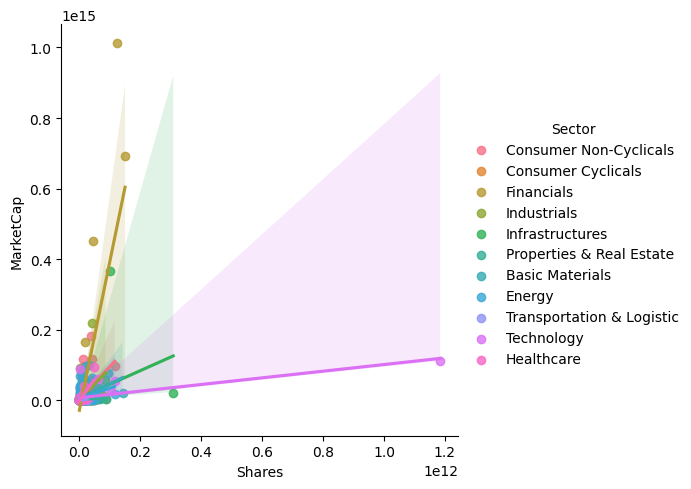

In [319]:
sns.lmplot(x='Shares', y='MarketCap', hue='Sector', data=Data_saham);

Sektor Healthcare merupakan jenis sektor dengan jumlah saham beredar terbanyak di Bursa Efek Indonesia akan tetapi nilai kapitalisasi pasarnya rendah


---

Berbeda dengan sektor Financials yang memiliki jumlah saham beredar cenderung sedikit akan tetapi nilai kapitalisasi pasarnya adalah yang terbesar di Bursa Efek Indonesia.

---
Berdasarkan data korelasi tersebut kita dapat mengambil kesimpulan sementara bahwa jumlah saham beredar semakin banyak belum tentu akan mencerminkan nilai kapitalisasi pasarnya. untuk analisa lebih lanjut mari kita cek apakah Jumlah saham beredar memiliki preperensi dengan kapitalisasi pasarnya?

### Cek preferensi menggunakan single hipotesis testing

In [320]:
# Membuat kolom baru berisi tahun pada data
Data_saham['DailyLastUpdated'] = pd.DatetimeIndex(Data_saham['DailyLastUpdated']).year

In [321]:
# Filter data hanya untuk tahun 2022

saham_2022 = Data_saham[Data_saham['DailyLastUpdated'] == 2022]

In [322]:
# Menghitung rata-rata kapitalisasi pasar saham untuk tahun 2021
avg_marketcap_2022 = saham_2022['MarketCap'].mean()

In [323]:
# Menampilkan hasil
print("Rata-rata kapitalisasi pasar saham tahun 2022 adalah: ", avg_marketcap_2022)

Rata-rata kapitalisasi pasar saham tahun 2022 adalah:  1516958350000.0


Untuk memeriksa apakah Kapitalisasi Pasar saham di Bursa Efek Indonesia meningkat secara signifikan atau tidak, kami akan melakukan sampel tunggal satu sisi dan menetapkan tingkat signifikansi 0,05. Kami menggunakan metode ini karena kami hanya menguji variabel dan membandingkan kapitalisasi pasar (data tahun terakhir) dan jumlah saham beredar.

Hipotesis kami tentang kasus ini:

H0: μ <= 1,5 Triliun Rupiah

H1: μ > 1,5 Triliun Rupiah

In [324]:
kapitalisasi_pasar = Data_saham[['Shares','MarketCap']].groupby('Shares').sum()

In [325]:
kapitalisasi_pasar

,MarketCap
Shares,
3.600000e+06,1.044000e+11
7.000000e+07,1.484000e+10
7.542220e+07,2.383342e+10
9.600000e+07,5.952000e+10
1.015380e+08,1.472301e+12
...,...
1.220423e+11,1.012951e+15
1.417840e+11,2.155117e+13
1.500434e+11,6.932006e+14


In [326]:
t_stat,p_val = stats.ttest_1samp(kapitalisasi_pasar.MarketCap, 1500000000000)
print('P-value:',p_val/2)
print('t-statistics:',t_stat)

P-value: 5.194264059003604e-07
t-statistics: 4.923413562126822


Nilai dari P-Value diatas dari 0,05 maka dapat diambil kesimpulan tidak tolah H 0. P-value tidak signifikan (lebih besar dari 0,05), maka kita tidak dapat menolak hipotesis nol dan tidak ada bukti yang cukup untuk menunjukkan adanya hubungan atau perbedaan yang signifikan secara statistik antara Kapitalisasi pasar dengan jumlah saham beredar

# Kesimpulan 

Pemilihan sektor Financials yang didalamnya memiliki saham-saham perbankan dirasa cukup tepat mengingat porsi kapitalisasi nilai pasarnya adalah yang terbesar di Bursa Efek Indonesia hal ini dapat kita lihat melalui data korelasi Jumlah saham beredar dengan kapitalisasi pasar berdasrkan sektor industrinya.


---

Faktor kapitalisasi pasar amat penting dalam berinvestasi karena nilai tersebut akan mencerminkan seberapa liquid saham tersebut, yang artinya jika semakin besar nilai kapitalisasinya maka terdapat orang yang berinvesasi pada harga tersebut dan hal ini akan menimalisir adanya pergerakan harga yang bergerak secara fluktuatif karena adanya aktifitas spekulasi.

---
Di Bursa Efek Indonesia saham dengan kapitalisasi pasar terbesar adalah Bank BCA (BBCA). sebagai seorang data analyst saya memberikan rekomendasi untuk saham BBCA dijadikan salah satu pertimbangan investasi dari portofolio Candy Crush Sekuritas dengan alasan sebagai berikut:
1. Kapitalisasi Pasar : hampir 1000 Triliun rupiah dan terbesar di Bursa Efek Indonesia
2. Jumlah saham beredar : persebaran saham BCA yang diterbitkan kepublik berada di urutan nomer 2 sebesar 1.2 Triliun lembar saham di bawah Bank BRI. akan tetapi dengan jumlah saham beredar sebanyak 1.2 Triliun lembar saham, saham BBCA memiliki kapitalisasi pasar terbesar dibandingakan saham BBRI yang kapitalisasi pasarnya berada di urutan kedua setelah saham BBCA
3. Harga Saham : Berdasarkan analisis pergerakan harga saham BBCA sejak awal terbit di Bursa efek Indonesia hingga sekarang. pergerakan harganya tidak fluktuatif sehingga nilai risiko penurunan harga drastis cukup kecil.

